## BAKERY DATASET

In [ ]:
!pip install efficient-apriori

In [ ]:
from efficient_apriori import apriori
import pandas as pd
import numpy as np
food_names=['receipt#',"Chocolate Cake","Lemon Cake",
            "Casino Cake","Opera Cake", "Strawberry Cake",
            "Truffle Cake", "Chocolate Eclair", "Coffee Eclair",
            "Vanilla Eclair", "Napolean Cake", "Almond Tart",
            "Apple Pie", "Apple Tart","Apricot Tart", "Berry Tart",
            "Blackberry Tart", "Blueberry Tart", "Chocolate Tart",
            "Cherry Tart", "Lemon Tart", "Pecan Tart", "Ganache Cookie",
            "Gongolais Cookie", "Raspberry Cookie", "Lemon Cookie",
            "Chocolate Meringue", "Vanilla Meringue", "Marzipan Cookie",
            "Tuile Cookie", "Walnut Cookie", "Almond Croissant",
            "Apple Croissant", "Apricot Croissant", "Cheese Croissant",
            "Chocolate Croissant", "Apricot Danish", "Apple Danish",
            "Almond Twist", "Almond Bear_Claw", "Blueberry Danish",
            "Lemon Lemonade", "Raspberry Lemonade", "Orange Juice",
            "Green Tea", "Bottled Water", "Hot Coffee", "Chocolate Coffee",
            "Vanilla Frappucino", "Cherry Soda", "Single Espresso"]
df=pd.read_csv('/content/20000-out2.csv',header=None,names=food_names)
df

,receipt#,Chocolate Cake,Lemon Cake,Casino Cake,Opera Cake,Strawberry Cake,Truffle Cake,Chocolate Eclair,Coffee Eclair,Vanilla Eclair,...,Lemon Lemonade,Raspberry Lemonade,Orange Juice,Green Tea,Bottled Water,Hot Coffee,Chocolate Coffee,Vanilla Frappucino,Cherry Soda,Single Espresso
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
19996,19997,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
19997,19998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19998,19999,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df=df.drop("receipt#",axis=1)
func= lambda record : [df.columns[x]
                       for x in range(0,len(df.columns))
                       if record[x]==1]
transactions = list(map(func,df.values))
transactions[:5]

[['Lemon Cake', 'Lemon Tart'],
 ['Truffle Cake', 'Apricot Danish', 'Orange Juice', 'Bottled Water'],
 ['Almond Tart',
  'Chocolate Tart',
  'Vanilla Meringue',
  'Marzipan Cookie',
  'Tuile Cookie',
  'Apple Croissant',
  'Apricot Croissant'],
 ['Casino Cake',
  'Truffle Cake',
  'Cherry Tart',
  'Gongolais Cookie',
  'Marzipan Cookie',
  'Chocolate Coffee'],
 ['Raspberry Cookie',
  'Lemon Cookie',
  'Lemon Lemonade',
  'Raspberry Lemonade',
  'Green Tea']]

In [ ]:
itemsets, rules = apriori(transactions,
                          min_support = 0.05,
                          min_confidence = 0.25)
print("Itemsets: ")
itemsets

Itemsets: 


{1: {('Lemon Cake',): 1720,
  ('Lemon Tart',): 1519,
  ('Truffle Cake',): 1693,
  ('Apricot Danish',): 1854,
  ('Orange Juice',): 1848,
  ('Bottled Water',): 1443,
  ('Chocolate Tart',): 1527,
  ('Marzipan Cookie',): 1729,
  ('Tuile Cookie',): 1973,
  ('Apple Croissant',): 1420,
  ('Apricot Croissant',): 1634,
  ('Casino Cake',): 1506,
  ('Cherry Tart',): 1825,
  ('Gongolais Cookie',): 1837,
  ('Chocolate Coffee',): 1645,
  ('Raspberry Cookie',): 1389,
  ('Lemon Cookie',): 1365,
  ('Lemon Lemonade',): 1331,
  ('Raspberry Lemonade',): 1369,
  ('Green Tea',): 1243,
  ('Strawberry Cake',): 1840,
  ('Napolean Cake',): 1690,
  ('Vanilla Frappucino',): 1535,
  ('Hot Coffee',): 2072,
  ('Blackberry Tart',): 1534,
  ('Walnut Cookie',): 1390,
  ('Almond Twist',): 1463,
  ('Cherry Soda',): 1306,
  ('Apple Tart',): 1385,
  ('Blueberry Tart',): 1678,
  ('Coffee Eclair',): 2197,
  ('Apple Pie',): 1483,
  ('Single Espresso',): 1422,
  ('Apple Danish',): 1351,
  ('Chocolate Cake',): 1673,
  ('Opera C

In [ ]:
print("Rules: ")
rules

Rules: 


[{Cherry Tart} -> {Apricot Danish}, {Apricot Danish} -> {Cherry Tart}]

### Extract frequent itemsets and their support values

In [ ]:
frequent_itemsets = []
for sizez,itemset in itemsets.items():
  for items , support in itemset.items():
    frequent_itemsets.append((items,support))
frequent_itemsets

[(('Lemon Cake',), 1720),
 (('Lemon Tart',), 1519),
 (('Truffle Cake',), 1693),
 (('Apricot Danish',), 1854),
 (('Orange Juice',), 1848),
 (('Bottled Water',), 1443),
 (('Chocolate Tart',), 1527),
 (('Marzipan Cookie',), 1729),
 (('Tuile Cookie',), 1973),
 (('Apple Croissant',), 1420),
 (('Apricot Croissant',), 1634),
 (('Casino Cake',), 1506),
 (('Cherry Tart',), 1825),
 (('Gongolais Cookie',), 1837),
 (('Chocolate Coffee',), 1645),
 (('Raspberry Cookie',), 1389),
 (('Lemon Cookie',), 1365),
 (('Lemon Lemonade',), 1331),
 (('Raspberry Lemonade',), 1369),
 (('Green Tea',), 1243),
 (('Strawberry Cake',), 1840),
 (('Napolean Cake',), 1690),
 (('Vanilla Frappucino',), 1535),
 (('Hot Coffee',), 2072),
 (('Blackberry Tart',), 1534),
 (('Walnut Cookie',), 1390),
 (('Almond Twist',), 1463),
 (('Cherry Soda',), 1306),
 (('Apple Tart',), 1385),
 (('Blueberry Tart',), 1678),
 (('Coffee Eclair',), 2197),
 (('Apple Pie',), 1483),
 (('Single Espresso',), 1422),
 (('Apple Danish',), 1351),
 (('Choco

In [ ]:
#Sort frequent itemsets by support in descending order
sorted_itemsets = sorted(frequent_itemsets,
                         key=lambda x: x[1], reverse=True)
# Print sorted frequent itemsets
for items, support in sorted_itemsets:
  print(f"Items: {', '.join(items)}-Support: {support}")

Items: Coffee Eclair-Support: 2197
Items: Hot Coffee-Support: 2072
Items: Tuile Cookie-Support: 1973
Items: Apricot Danish-Support: 1854
Items: Orange Juice-Support: 1848
Items: Strawberry Cake-Support: 1840
Items: Gongolais Cookie-Support: 1837
Items: Cherry Tart-Support: 1825
Items: Marzipan Cookie-Support: 1729
Items: Lemon Cake-Support: 1720
Items: Truffle Cake-Support: 1693
Items: Napolean Cake-Support: 1690
Items: Berry Tart-Support: 1686
Items: Blueberry Tart-Support: 1678
Items: Chocolate Cake-Support: 1673
Items: Opera Cake-Support: 1673
Items: Chocolate Coffee-Support: 1645
Items: Apricot Croissant-Support: 1634
Items: Cheese Croissant-Support: 1634
Items: Vanilla Frappucino-Support: 1535
Items: Blackberry Tart-Support: 1534
Items: Chocolate Tart-Support: 1527
Items: Lemon Tart-Support: 1519
Items: Casino Cake-Support: 1506
Items: Apple Pie-Support: 1483
Items: Almond Twist-Support: 1463
Items: Bottled Water-Support: 1443
Items: Single Espresso-Support: 1422
Items: Apple Croi

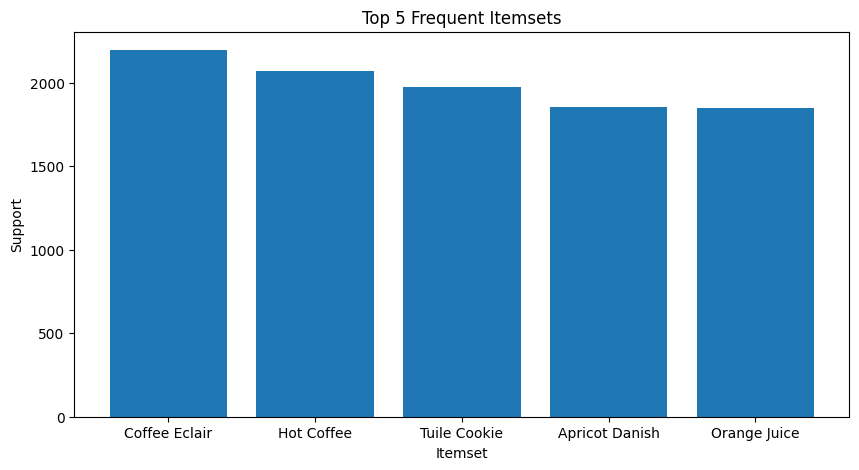

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(item_names,support_values)
plt.xlabel('Itemset')
plt.ylabel('Support')
plt.title('Top 5 Frequent Itemsets')
plt.show()